# Task2: Unemployment rate in India during covid-19

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import warnings
warnings.filterwarnings("ignore")

## Reading Data Frame

In [2]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


## Dataframe Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


- df of size 267 rows and 9 column 

## Descriptive Stats

In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


## Checking Column names

In [5]:
# we find discrepancy in column names
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [6]:
#Reassigning Column names to dataframe to remove discripancy
df.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region', 'longitude', 'latitude']

## Change the datatype of Date column to datetime64

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


## Checking NaN or Duplicated values in Dataframe

In [9]:
df.isnull().sum()
#df.dropna(axis=0,inplace=True)

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

In [10]:
df.duplicated().sum()

0

 - df does not contain any nan or duplicat values

### Unique States Values

In [11]:
df['States'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

### Unique Region Values

In [12]:
df['Region'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

### Adding extra featutres to df

In [13]:
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Month_name'] =  df['Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df['Year'].unique()

array([2020], dtype=int64)

In [15]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month,Year,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,2020,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,2020,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,2020,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,2020,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,2020,May


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   Month                                267 non-null    int64         
 10  Year          

## Descriptive Statistics

In [17]:
df_stats=df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
df_stats.head()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,5.48,16635535,41.02
1,5.83,16545652,40.90
2,5.79,15881197,39.18
3,20.51,11336911,33.10
4,17.43,12988845,36.46


In [18]:
df_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,1.223693e+01,1.080328e+01,0.50,4.845,9.65,1.675500e+01,75.85
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.00,2838930.500,9732417.00,2.187869e+07,59433759.00
Estimated Labour Participation Rate,267.0,4.168157e+01,7.845419e+00,16.77,37.265,40.39,4.405500e+01,69.69


## Average Unemployment Rate Region Wise(%)

In [19]:
region_group=df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()

region_group=round(region_group,2)

region_group

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
Region,,,
East,13.92,19602366.90,40.11
North,15.89,13072487.92,38.70
Northeast,10.95,3617105.53,52.06
South,10.45,14040589.33,40.44
West,8.24,18623512.72,41.26


## Region Wise Unemployment Rate

In [20]:
px.bar(data_frame=region_group.sort_values('Estimated Unemployment Rate'),x=region_group.index,y='Estimated Unemployment Rate',template='seaborn',
      title='Average Unemployment rate Region-wise')

- The West region has the highest average unemployment rate among all, followed by the South, Northeast, and North.
- The East Region has the lowest unemployment rate.

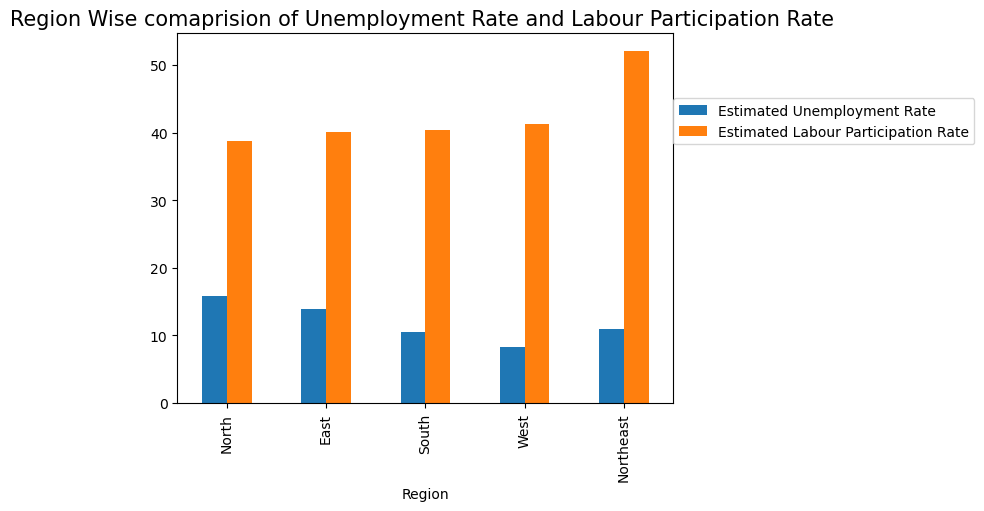

In [21]:
region_group[['Estimated Unemployment Rate','Estimated Labour Participation Rate']].sort_values('Estimated Labour Participation Rate').plot(kind='bar')
plt.title("Region Wise comaprision of Unemployment Rate and Labour Participation Rate ",size=15)
plt.legend(loc=(1,0.7))
plt.show()


- The average estimated labour participation rate is highest in the Northeast region.
- All the other regions have almost equal labour participation rates.


In [23]:
px.bar(data_frame=df,x='Month_name',y='Estimated Unemployment Rate',color='States',title='Unemployment_Rate of each Month for all States')

- From the above visualisation, it is clear that April and May have the highest unemployment rates among all.
- Other months of state's have almost equal Unemployment Rate'

## Region Wise Estimated Employed 

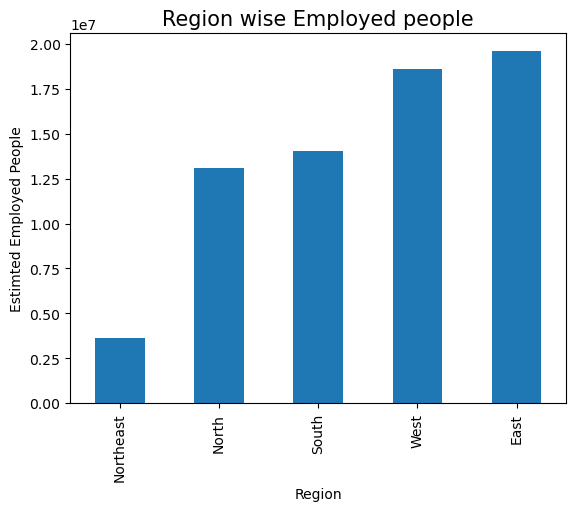

In [24]:
region_group['Estimated Employed'].sort_values().plot(kind='bar')
plt.title('Region wise Employed people',size=15)
plt.ylabel('Estimted Employed People',size=10)
plt.show()

- The East and West regions have the highest people employed.
- Northeast has lowest people unemployed.

## Correalation Matrix

<Axes: >

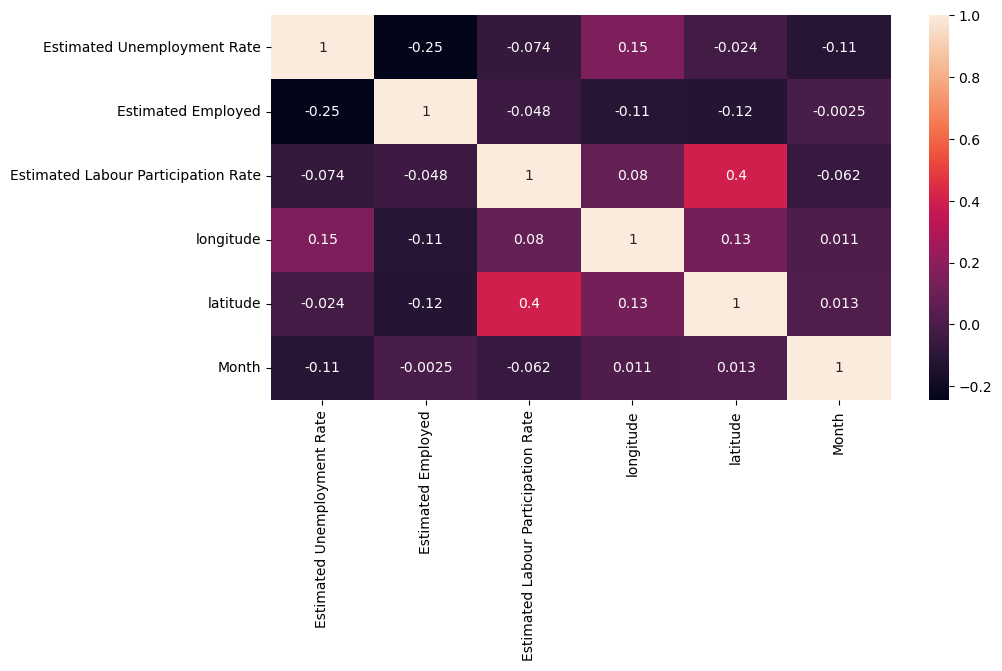

In [25]:
plt.figure(figsize=(10,5)),
sns.heatmap(df.iloc[:,:-2].corr(),annot=True)

In [26]:
px.bar(data_frame=df,y='Estimated Unemployment Rate',x='States',color='Month_name',title="Unemployment Rate for each State for diiferent month")

In [27]:
States_group=df.groupby(['States'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
States_group=round(States_group,2)
States_group=States_group.sort_values('Estimated Unemployment Rate',ascending=False)
States_group.head()

,States,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
7,Haryana,27.48,6844059.0,42.10
23,Tripura,25.06,1397291.6,57.85
10,Jharkhand,19.54,8770642.4,40.36
2,Bihar,19.47,23606828.0,37.17
4,Delhi,18.41,4632821.9,35.86


In [28]:
fig = px.bar(States_group, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='ggplot2',width=1000, height=500)

fig.show()

In [29]:
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='seaborn')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

In [30]:
R_state = df.groupby(['Region','States']).agg({'Estimated Unemployment Rate': 'mean'})
R_state

Estimated Unemployment Rate
Region    States                                       
East      Bihar                               19.471000
          Jharkhand                           19.539000
          Odisha                               6.462000
          West Bengal                         10.192000
North     Delhi                               18.414000
          Haryana                             27.477000
          Himachal Pradesh                    16.065000
          Jammu & Kashmir                     16.477778
          Punjab                              11.981000
          Rajasthan                           15.868000
          Uttar Pradesh                        9.737000
          Uttarakhand                         11.156000
Northeast Assam                                4.856000
          Meghalaya                            3.866000
          Sikkim                               9.792500
          Tripura                             25.055000
South     Andhra Pradesh                       8.664000
          Karnataka                            7.668000
          Kerala                               9.434000
          Puducherry                          17.942000
          Tamil Nadu                          12.187000
          Telangana                            6.833000
West      Chhattisgarh                         7.819000
          Goa                                 12.167000
          Gujarat                              6.376000
          Madhya Pradesh                       6.854000
          Maharashtra                          7.979000

In [31]:
fig = px.sunburst(R_state.reset_index(), path=['Region','States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='seaborn')


fig.show()

In [32]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

## YASH SINGH